In [596]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score, f1_score

%matplotlib inline

## Load the dataset

In [597]:
df = pd.read_csv("Exoplanets_2024.06.09_05.32.23.csv", delimiter=',', skiprows=35)

In [750]:
df.head().T

,0,1,2,3,4
kepid,10848459,6721123,10419211,10464078,10480982
kepoi_name,K00754.01,K00114.01,K00742.01,K00743.01,K00744.01
kepler_name,NaN,NaN,NaN,NaN,NaN
koi_disposition,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
koi_pdisposition,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
koi_score,0.0,0.0,0.0,0.0,0.0
koi_fpflag_nt,0,0,0,0,0
koi_fpflag_ss,1,1,1,1,1
koi_fpflag_co,0,1,0,0,0
koi_fpflag_ec,0,0,0,0,0


In [599]:
df['koi_tce_plnt_num'].value_counts()

koi_tce_plnt_num
1.0    7745
2.0     972
3.0     326
4.0     111
5.0      41
6.0      14
7.0       8
8.0       1
Name: count, dtype: int64

In [600]:
df['koi_tce_delivname'].value_counts()

koi_tce_delivname
q1_q17_dr25_tce    8054
q1_q16_tce          796
q1_q17_dr24_tce     368
Name: count, dtype: int64

In [601]:
df.shape

(9564, 27)

In [602]:
#Column that will be treated as label for classification models.
df.koi_disposition.value_counts()

koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2743
CANDIDATE         1982
Name: count, dtype: int64

In [749]:
df.groupby(['koi_disposition'])[flags].sum()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec
koi_disposition,,,,
CANDIDATE,1,2,0,0
CONFIRMED,468,14,0,0
FALSE POSITIVE,1526,2210,1889,1148


In [603]:
df['label']=df['koi_disposition']
df_feat=df.iloc[:, 10:].copy()

In [604]:
#objects with the known labels: confirmed as an exoplanet or false positive (not an exoplanet).
#df_known_raw=df[df['koi_disposition']!='CANDIDATE']

In [605]:
df_feat.shape

(9564, 18)

In [606]:
#objects that are need to be defined
#df_unknown_raw=df[df['koi_disposition'] =='CANDIDATE']

In [607]:
df_feat.label.value_counts()

label
FALSE POSITIVE    4839
CONFIRMED         2743
CANDIDATE         1982
Name: count, dtype: int64

In [608]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_period         9564 non-null   float64
 1   koi_time0bk        9564 non-null   float64
 2   koi_impact         9201 non-null   float64
 3   koi_duration       9564 non-null   float64
 4   koi_depth          9201 non-null   float64
 5   koi_prad           9201 non-null   float64
 6   koi_teq            9201 non-null   float64
 7   koi_insol          9243 non-null   float64
 8   koi_model_snr      9201 non-null   float64
 9   koi_tce_plnt_num   9218 non-null   float64
 10  koi_tce_delivname  9218 non-null   object 
 11  koi_steff          9201 non-null   float64
 12  koi_slogg          9201 non-null   float64
 13  koi_srad           9201 non-null   float64
 14  ra                 9564 non-null   float64
 15  dec                9564 non-null   float64
 16  koi_kepmag         9563 

In [609]:
df_feat=df_feat.dropna()

In [610]:
df_feat.label.value_counts()

label
FALSE POSITIVE    4381
CONFIRMED         2731
CANDIDATE         1833
Name: count, dtype: int64

In [747]:
#remove unnecessary columns: kepid, kepo
flags=df.filter(regex=r'koi_fpflag').columns

In [748]:
flags

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec'], dtype='object')

In [612]:
#df_known_raw['label']=df_known_raw['koi_disposition']

In [613]:
# not an exoplanet = 0, exoplanet = 1
#df_known_raw['label'] = df_known_raw.label.replace('FALSE POSITIVE',0).replace('CONFIRMED',1).astype(int)

In [614]:
#df_known=df_known_raw.iloc[:, 10:].copy()

In [615]:
#df_unknown=df_unknown_raw.iloc[:, 10:].copy()

In [616]:
numeric_columns = [col for col in df_feat.columns if pd.api.types.is_numeric_dtype(df_feat[col])]
numeric_columns

['koi_period',
 'koi_time0bk',
 'koi_impact',
 'koi_duration',
 'koi_depth',
 'koi_prad',
 'koi_teq',
 'koi_insol',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_slogg',
 'koi_srad',
 'ra',
 'dec',
 'koi_kepmag']

## Boxplots of features

In [617]:
df_feat.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,label
0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564,0.791,285.53461,48.285210,15.597,FALSE POSITIVE
1,7.361790,132.250530,1.169,5.02200,233.7,39.21,1342.0,767.22,47.7,1.0,q1_q17_dr25_tce,6227.0,3.986,1.958,298.86435,42.151569,12.660,FALSE POSITIVE
2,11.521446,170.839688,2.483,3.63990,17984.0,150.51,753.0,75.88,622.1,1.0,q1_q17_dr25_tce,5795.0,4.554,0.848,297.07993,47.597401,15.472,FALSE POSITIVE
3,19.403938,172.484253,0.804,12.21550,8918.7,7.18,523.0,17.69,214.7,1.0,q1_q17_dr25_tce,5043.0,4.591,0.680,289.25821,47.635319,15.487,FALSE POSITIVE
4,19.221389,184.552164,1.065,4.79843,74284.0,49.29,698.0,55.97,2317.0,1.0,q1_q17_dr25_tce,6117.0,4.496,0.947,295.81454,47.690350,15.341,FALSE POSITIVE


In [618]:
df_feat.describe()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,8945.000000,8945.000000,8945.000000,8945.000000,8.945000e+03,8945.000000,8945.000000,8.945000e+03,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000
mean,55.678924,164.278021,0.731219,5.539390,2.440240e+04,103.836524,1095.128228,7.636370e+03,265.700704,1.239911,5700.092342,4.309781,1.734644,292.089269,43.809421,14.280905
std,116.963448,66.255034,3.233865,6.413855,8.330044e+04,3117.326455,851.928698,1.601557e+05,804.188708,0.655849,797.056303,0.434144,6.192780,4.773284,3.601858,1.373123
min,0.259820,120.515914,0.000000,0.052000,0.000000e+00,0.080000,92.000000,2.000000e-02,0.000000,1.000000,2661.000000,0.047000,0.109000,279.852720,36.577381,6.966000
25%,2.621707,132.701600,0.198500,2.437000,1.608000e+02,1.400000,553.000000,2.217000e+01,12.300000,1.000000,5300.000000,4.218000,0.828000,288.697420,40.776970,13.462000
50%,8.827158,136.823360,0.545000,3.778000,4.245000e+02,2.410000,888.000000,1.469500e+02,23.700000,1.000000,5763.000000,4.438000,1.000000,292.292390,43.671661,14.531000
75%,33.788803,169.833943,0.892000,6.158000,1.517500e+03,15.640000,1392.000000,8.867200e+02,80.200000,1.000000,6108.000000,4.543000,1.345000,295.907440,46.703129,15.324000
max,1071.232624,1472.522306,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,8.000000,15896.000000,5.364000,229.908000,301.720760,52.336010,20.003000


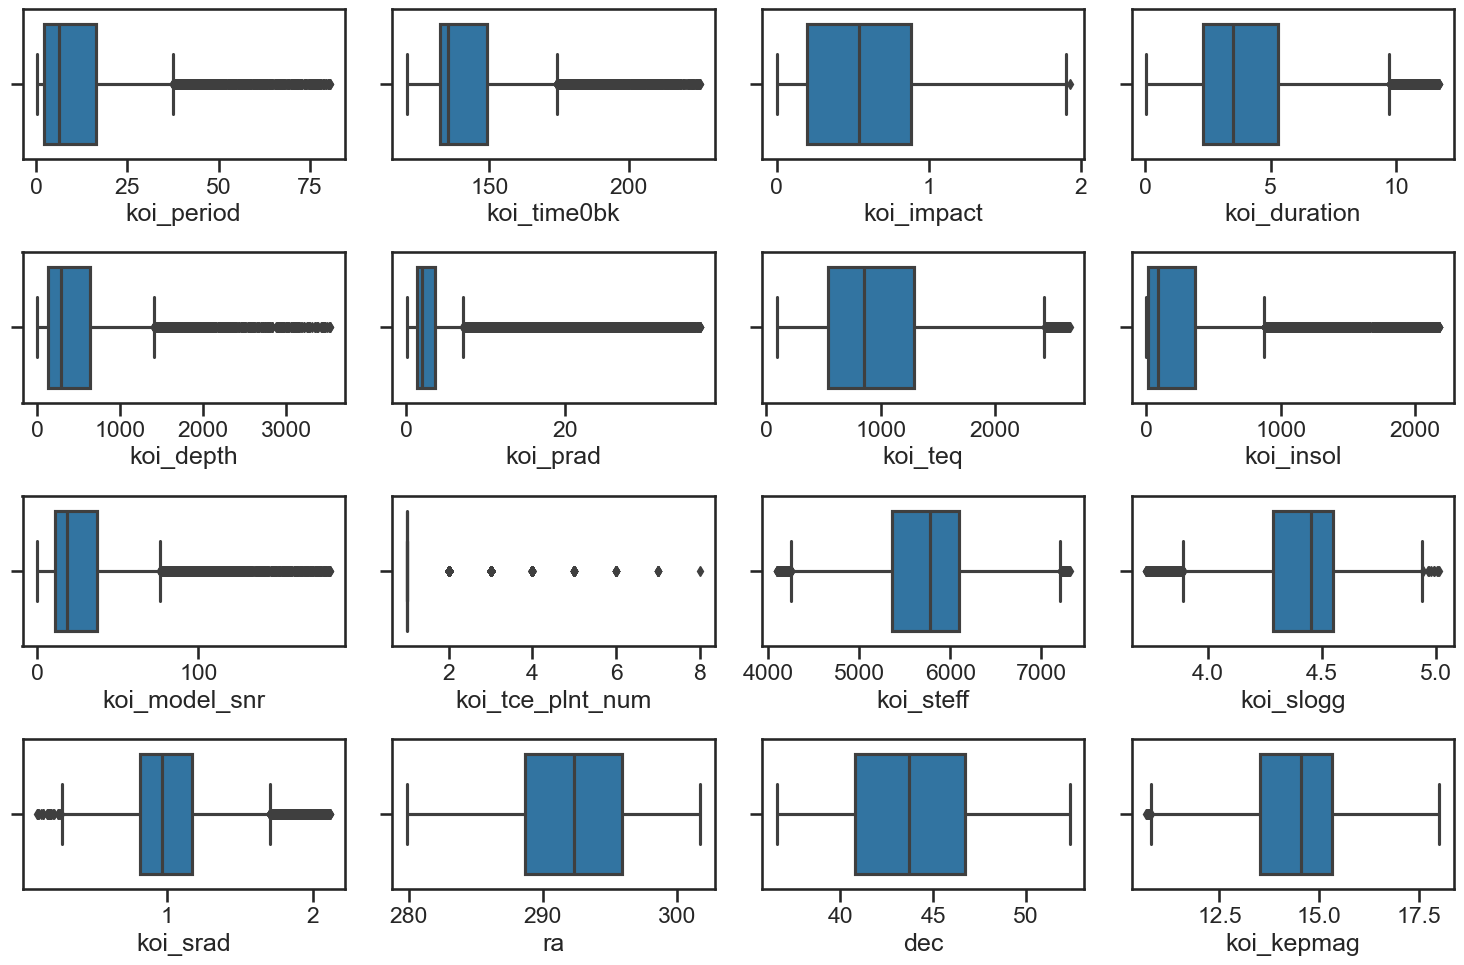

In [631]:
fig, ax = plt.subplots(4, 4, figsize=(15, 10))
for var, subplot in zip(numeric_columns, ax.flatten()):
    sns.boxplot(x=var, data=df_feat, ax=subplot)
plt.tight_layout()
plt.savefig('boxplots.png', dpi=300, bbox_inches='tight') 

### Removing outliers for AdaBoost

In [622]:
df_feat.shape

(8945, 18)

In [623]:
outliers={}

for col in numeric_columns:
    #df_o=df_out[col]
    Q1 = df_feat[col].quantile(0.25)
    Q3 = df_feat[col].quantile(0.75)

# Calculate the IQR
    IQR = Q3 - Q1

# Make a dataset with the outliers
    mask=((df_feat[col] < (Q1 - 1.5 * IQR)) | (df_feat[col] > (Q3 + 1.5 * IQR)))
    if col!='koi_tce_plnt_num':
        df_feat[col] = np.where(mask, np.nan, df_feat[col])

    outliers[col]=mask.value_counts().get(True, 0)
    
df_outlier=pd.DataFrame(outliers.items(), columns=['feature', 'outliers'])
df_outlier['%']=df_outlier['outliers']/df_feat.shape[0]*100

In [624]:
df_outlier

,feature,outliers,%
0,koi_period,1438,16.076020
1,koi_time0bk,919,10.273896
2,koi_impact,80,0.894354
3,koi_duration,791,8.842929
4,koi_depth,1767,19.754053
5,koi_prad,1381,15.438793
6,koi_teq,396,4.427054
7,koi_insol,1375,15.371716
8,koi_model_snr,1567,17.518167
9,koi_tce_plnt_num,1419,15.863611


In [625]:
df_feat.isna().sum()

koi_period           1438
koi_time0bk           919
koi_impact             80
koi_duration          791
koi_depth            1767
koi_prad             1381
koi_teq               396
koi_insol            1375
koi_model_snr        1567
koi_tce_plnt_num        0
koi_tce_delivname       0
koi_steff             532
koi_slogg             652
koi_srad              959
ra                      0
dec                     0
koi_kepmag            150
label                   0
dtype: int64

In [626]:
df_no_outliers=df_feat.dropna()

In [627]:
df_no_outliers

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,label
6,2.696371,170.737690,0.044,3.6129,397.9,1.58,1066.0,305.34,48.2,1.0,q1_q17_dr25_tce,4989.0,4.504,0.819,283.76547,47.804298,15.269,FALSE POSITIVE
8,1.506354,170.998064,0.860,1.5155,2211.7,4.53,1452.0,1054.12,181.1,1.0,q1_q17_dr25_tce,5714.0,4.563,0.831,295.66522,49.351009,15.525,FALSE POSITIVE
11,2.701288,170.695790,1.016,3.3827,860.4,6.54,1222.0,527.81,48.3,1.0,q1_q17_dr25_tce,5550.0,4.468,0.910,297.92365,48.777321,15.540,FALSE POSITIVE
16,3.341913,171.639430,1.213,3.8130,725.3,21.55,1032.0,268.67,39.0,1.0,q1_q17_dr25_tce,5295.0,4.551,0.811,292.31595,38.270290,15.629,FALSE POSITIVE
17,1.626630,169.820171,1.260,2.1145,1620.6,32.43,1547.0,1355.88,103.6,1.0,q1_q17_dr25_tce,5735.0,4.410,0.973,294.36819,38.310280,15.279,FALSE POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9549,0.805942,132.127874,1.339,1.4432,3180.4,29.85,1498.0,1189.65,55.4,1.0,q1_q17_dr25_tce,5022.0,4.597,0.672,291.55447,51.043201,14.169,CANDIDATE
9552,5.887704,135.037380,0.185,4.0090,39.7,0.60,1026.0,262.67,9.3,1.0,q1_q17_dr25_tce,6065.0,4.495,0.947,293.43494,46.039440,13.811,CANDIDATE
9553,1.985146,132.026820,0.126,1.6250,233.4,1.28,1299.0,675.28,11.0,1.0,q1_q17_dr25_tce,5581.0,4.559,0.845,282.03058,46.750809,15.988,CANDIDATE
9555,5.825617,136.036900,0.635,3.2460,142.8,1.21,1037.0,273.08,9.2,1.0,q1_q17_dr25_tce,5999.0,4.459,0.967,297.58023,46.719952,15.449,CANDIDATE


In [628]:
df_no_outliers.label.value_counts()

label
CONFIRMED         2025
FALSE POSITIVE    1051
CANDIDATE          962
Name: count, dtype: int64

In [632]:
df_no_outliers.shape

(4038, 18)

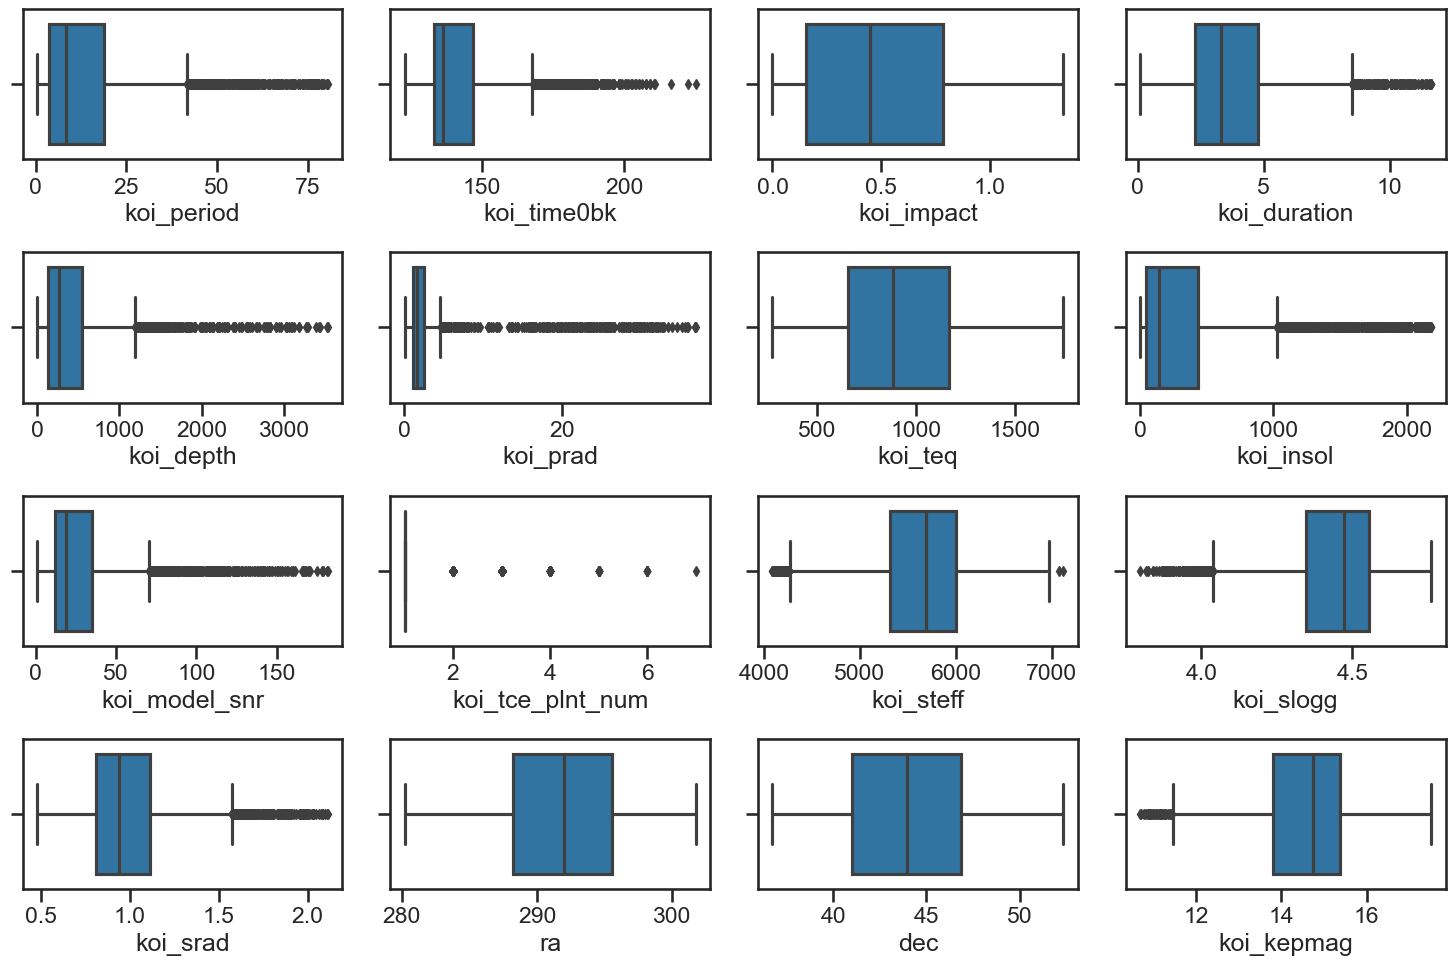

In [630]:
fig, ax = plt.subplots(4, 4, figsize=(15, 10))
for var, subplot in zip(numeric_columns, ax.flatten()):
    sns.boxplot(x=var, data=df_no_outliers, ax=subplot)
plt.tight_layout()
plt.savefig('boxplots2.png', dpi=300, bbox_inches='tight') 

In [476]:
df_no_outliers.describe()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000
mean,14.596746,143.934674,0.486768,3.747471,423.800966,3.058115,933.700594,354.180537,28.768326,1.322437,5617.961119,4.432115,1.001978,291.763169,43.988621,14.499981
std,15.997753,16.135299,0.357752,2.031751,462.757836,5.246393,346.839125,482.515924,27.245496,0.714371,520.714555,0.169286,0.280506,4.777610,3.628314,1.094501
min,0.379412,122.946820,0.000000,0.104600,1.700000,0.080000,277.000000,1.400000,0.800000,1.000000,4090.000000,3.797000,0.480000,280.206600,36.743610,10.687000
25%,3.741716,133.094472,0.153000,2.264025,128.900000,1.170000,657.000000,44.112500,11.800000,1.000000,5311.000000,4.348000,0.812000,288.234740,40.985446,13.799000
50%,8.479916,136.323990,0.450500,3.295500,267.300000,1.680000,883.500000,144.155000,18.900000,1.000000,5689.000000,4.472000,0.941000,291.960130,43.932159,14.731500
75%,18.964884,146.945022,0.786000,4.763750,551.600000,2.540000,1166.000000,437.725000,35.300000,1.000000,6003.000000,4.555000,1.116000,295.542507,46.837564,15.366500
max,80.519237,225.046040,1.339000,11.641100,3529.200000,36.930000,1743.000000,2180.390000,181.900000,7.000000,7121.000000,4.761000,2.113000,301.720760,52.336010,17.511000


In [478]:
unknown=df_no_outliers[df_no_outliers['label']=='CANDIDATE']
known=df_no_outliers[df_no_outliers['label']!='CANDIDATE']

In [479]:
known['label'] = known.label.replace('FALSE POSITIVE',0).replace('CONFIRMED',1).astype(int)

In [480]:
candidates.shape

(991, 18)

In [481]:
known.shape

(3076, 18)

## Feature engineering

In [482]:
df_known=pd.get_dummies(known, columns=['koi_tce_delivname'], dtype=int)

In [483]:
df_known.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,label,koi_tce_delivname_q1_q16_tce,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce
6,2.696371,170.737690,0.044,3.6129,397.9,1.58,1066.0,305.34,48.2,1.0,4989.0,4.504,0.819,283.76547,47.804298,15.269,0,0,0,1
8,1.506354,170.998064,0.860,1.5155,2211.7,4.53,1452.0,1054.12,181.1,1.0,5714.0,4.563,0.831,295.66522,49.351009,15.525,0,0,0,1
11,2.701288,170.695790,1.016,3.3827,860.4,6.54,1222.0,527.81,48.3,1.0,5550.0,4.468,0.910,297.92365,48.777321,15.540,0,0,0,1
16,3.341913,171.639430,1.213,3.8130,725.3,21.55,1032.0,268.67,39.0,1.0,5295.0,4.551,0.811,292.31595,38.270290,15.629,0,0,0,1
17,1.626630,169.820171,1.260,2.1145,1620.6,32.43,1547.0,1355.88,103.6,1.0,5735.0,4.410,0.973,294.36819,38.310280,15.279,0,0,0,1


In [484]:
df_known.describe()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,label,koi_tce_delivname_q1_q16_tce,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce
count,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000
mean,13.847088,144.830966,0.506337,3.801509,470.277276,3.358872,949.210663,379.134698,33.634785,1.312094,5596.644018,4.435900,0.994348,291.770069,43.990308,14.493101,0.658322,0.011378,0.018856,0.969766
std,15.295081,17.007806,0.364269,2.002612,478.919822,5.617670,354.529941,507.331260,28.943129,0.705470,517.791055,0.166266,0.274675,4.759059,3.606128,1.081854,0.474349,0.106078,0.136037,0.171259
min,0.379412,122.946820,0.000000,0.104600,1.700000,0.080000,277.000000,1.400000,0.800000,1.000000,4090.000000,3.797000,0.501000,280.206600,36.743610,10.787000,0.000000,0.000000,0.000000,0.000000
25%,3.403222,133.025360,0.160000,2.350875,153.475000,1.270000,665.000000,46.272500,15.300000,1.000000,5288.000000,4.354000,0.811000,288.236020,40.993062,13.795500,0.000000,0.000000,0.000000,1.000000
50%,8.042974,136.454990,0.498500,3.344500,313.100000,1.850000,895.000000,151.655000,23.300000,1.000000,5675.000000,4.473500,0.934500,291.960480,43.932159,14.707000,1.000000,0.000000,0.000000,1.000000
75%,18.123848,149.329245,0.812000,4.812750,626.475000,2.700000,1196.000000,484.272500,40.825000,1.000000,5977.000000,4.556000,1.107000,295.521950,46.838467,15.344750,1.000000,0.000000,0.000000,1.000000
max,80.519237,225.046040,1.334000,11.641100,3529.200000,36.930000,1743.000000,2180.390000,181.900000,7.000000,7121.000000,4.753000,2.113000,301.720760,52.336010,17.511000,1.000000,1.000000,1.000000,1.000000


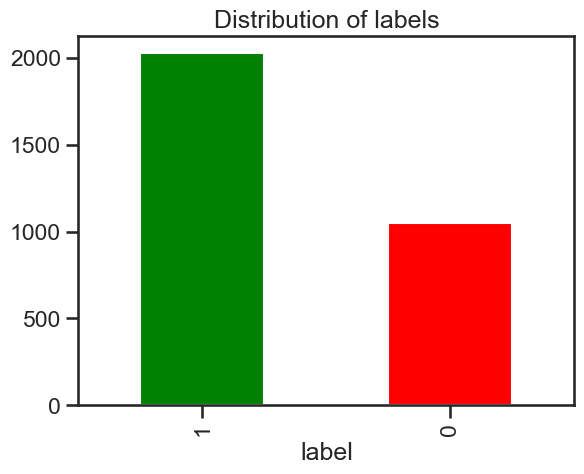

In [635]:
df_known.label.value_counts().plot.bar(color=['green', 'red'])
plt.title('Distribution of labels')
plt.savefig('labels.png', dpi=300, bbox_inches='tight')

In [486]:
df_known.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3076 entries, 6 to 7581
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   koi_period                         3076 non-null   float64
 1   koi_time0bk                        3076 non-null   float64
 2   koi_impact                         3076 non-null   float64
 3   koi_duration                       3076 non-null   float64
 4   koi_depth                          3076 non-null   float64
 5   koi_prad                           3076 non-null   float64
 6   koi_teq                            3076 non-null   float64
 7   koi_insol                          3076 non-null   float64
 8   koi_model_snr                      3076 non-null   float64
 9   koi_tce_plnt_num                   3076 non-null   float64
 10  koi_steff                          3076 non-null   float64
 11  koi_slogg                          3076 non-null   float64
 1

### Normalization

In [487]:
X_raw=df_known.drop(columns = ['label'])
y=df_known['label']

In [488]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_raw)

In [489]:
print(f"The range of feature inputs are within {X.min()} to {X.max()}")

The range of feature inputs are within 0.0 to 1.0000000000000004


In [490]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000
mean,0.168052,0.214342,0.379563,0.320453,0.132836,0.088979,0.458534,0.173353,0.181307,0.052016,0.497078,0.668305,0.306047,0.537482,0.464758,0.551175,0.011378,0.018856,0.969766
std,0.190855,0.166581,0.273065,0.173589,0.135767,0.152447,0.241835,0.232829,0.159818,0.117578,0.170832,0.173918,0.170394,0.221206,0.231275,0.160894,0.106078,0.136037,0.171259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.037732,0.098713,0.119940,0.194710,0.043026,0.032293,0.264666,0.020593,0.080066,0.000000,0.395249,0.582636,0.192308,0.373216,0.272534,0.447427,0.000000,0.000000,1.000000
50%,0.095627,0.132304,0.373688,0.280839,0.088278,0.048033,0.421555,0.068956,0.124241,0.000000,0.522930,0.707636,0.268921,0.546332,0.461029,0.582986,0.000000,0.000000,1.000000
75%,0.221418,0.258400,0.608696,0.408109,0.177116,0.071099,0.626876,0.221604,0.221010,0.000000,0.622567,0.793933,0.375931,0.711873,0.647422,0.677833,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [494]:
X.shape

(3076, 19)

In [495]:
y.shape

(3076,)

## Train logistic regression models

In [637]:
#split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = 42)

In [638]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (2153, 19), y_train: (2153,)


In [639]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (923, 19), y_test: (923,)


In [640]:
y.value_counts(normalize=True)

label
1    0.658322
0    0.341678
Name: proportion, dtype: float64

In [641]:
y_train.value_counts(normalize=True)

label
1    0.658151
0    0.341849
Name: proportion, dtype: float64

In [642]:
y_test.value_counts(normalize=True)

label
1    0.658722
0    0.341278
Name: proportion, dtype: float64

In [723]:
# L2 penalty to shrink coefficients without removing any features from the model
penalty= ['l2', 'l1', 'elasticnet']
# Our classification problem is multinomial
multi_class = 'auto'
# Use lbfgs for L2 penalty and multinomial classes
solver = ['lbfgs', 'saga', 'saga']
# Max iteration = 1000
max_iter = 1000
#elastic-net coef.
l1_ratio = 0.1

In [724]:
# Define a logistic regression model with above arguments
l2_model = LogisticRegression(random_state=42, penalty=penalty[0], multi_class=multi_class, solver=solver[0], max_iter=max_iter)

In [725]:
l2_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [726]:
l2_preds = l2_model.predict(X_test)

In [727]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [728]:
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.8504875406283857,
 'recall': array([0.64126984, 0.95888158]),
 'precision': array([0.88986784, 0.83764368]),
 'f1score': array([0.74538745, 0.89417178])}

In [729]:
l1_model = LogisticRegression(random_state=42, penalty=penalty[1], multi_class=multi_class, solver=solver[1], max_iter=max_iter)

In [730]:
l1_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', random_state=42, solver='saga')

In [731]:
l1_preds = l1_model.predict(X_test)

In [732]:
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.8537378114842904,
 'recall': array([0.66031746, 0.95394737]),
 'precision': array([0.88135593, 0.84425036]),
 'f1score': array([0.75499093, 0.8957529 ])}

In [733]:
print("LR L1:\n")
print(classification_report(y_test, l1_preds))
print('Accuracy score: ', round(accuracy_score(y_test, l1_preds), 2))
print('F1 Score: ', round(f1_score(y_test, l1_preds), 2))

LR L1:

              precision    recall  f1-score   support

           0       0.88      0.66      0.75       315
           1       0.84      0.95      0.90       608

    accuracy                           0.85       923
   macro avg       0.86      0.81      0.83       923
weighted avg       0.86      0.85      0.85       923

Accuracy score:  0.85
F1 Score:  0.9


In [734]:
print("LR L2:\n")
print(classification_report(y_test, l2_preds))
print('Accuracy score: ', round(accuracy_score(y_test, l2_preds), 2))
print('F1 Score: ', round(f1_score(y_test, l2_preds), 2))

LR L2:

              precision    recall  f1-score   support

           0       0.89      0.64      0.75       315
           1       0.84      0.96      0.89       608

    accuracy                           0.85       923
   macro avg       0.86      0.80      0.82       923
weighted avg       0.86      0.85      0.84       923

Accuracy score:  0.85
F1 Score:  0.89


In [735]:
en_model = LogisticRegression(random_state=42, penalty=penalty[2], multi_class=multi_class, solver=solver[2], max_iter = 1000, l1_ratio=l1_ratio)
en_model.fit(X_train, y_train)
en_preds = en_model.predict(X_test)

In [736]:
evaluate_metrics(y_test, en_preds)

{'accuracy': 0.8526543878656555,
 'recall': array([0.64761905, 0.95888158]),
 'precision': array([0.89082969, 0.84005764]),
 'f1score': array([0.75      , 0.89554531])}

In [737]:
print("LR Elastic net:\n")
print(classification_report(y_test, en_preds))
print('Accuracy score: ', round(accuracy_score(y_test, en_preds), 2))
print('F1 Score: ', round(f1_score(y_test, en_preds), 2))

LR Elastic net:

              precision    recall  f1-score   support

           0       0.89      0.65      0.75       315
           1       0.84      0.96      0.90       608

    accuracy                           0.85       923
   macro avg       0.87      0.80      0.82       923
weighted avg       0.86      0.85      0.85       923

Accuracy score:  0.85
F1 Score:  0.9


In [738]:
cf1 = confusion_matrix(y_test, l1_preds, normalize='true')

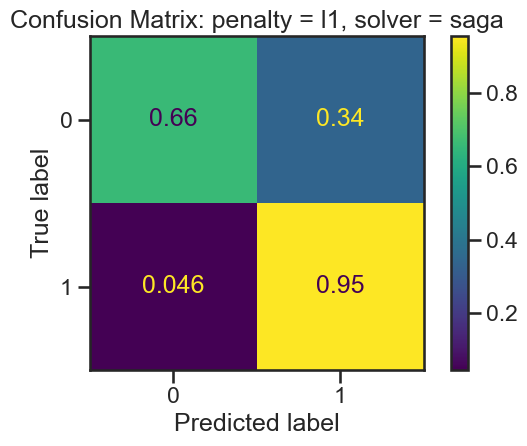

In [739]:
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf1,display_labels=l1_model.classes_)
disp.plot()
plt.title(f"Confusion Matrix: penalty = {penalty[1]}, solver = {solver[1]}")
plt.tight_layout()
plt.savefig('cf_l1.png', dpi=300, bbox_inches='tight')


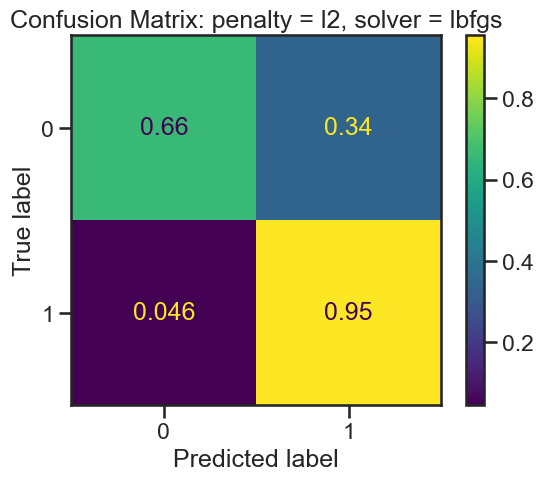

In [740]:
cf2 = confusion_matrix(y_test, l2_preds, normalize='true')
sns.set_context('talk')
disp.plot()
plt.title(f"Confusion Matrix: penalty = {penalty[0]}, solver = {solver[0]}")
disp = ConfusionMatrixDisplay(confusion_matrix=cf2,display_labels=l2_model.classes_)
plt.savefig('cm_l2.png', dpi=300, bbox_inches='tight')

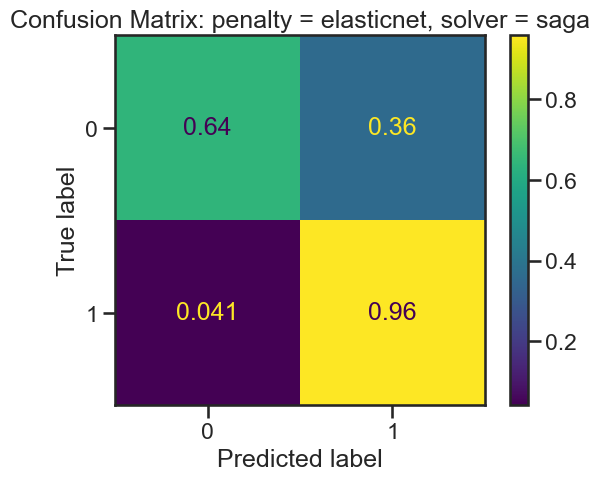

In [741]:
cf_en = confusion_matrix(y_test, en_preds, normalize='true')
sns.set_context('talk')
disp.plot()
plt.title(f"Confusion Matrix: penalty = {penalty[2]}, solver = {solver[2]}")
disp = ConfusionMatrixDisplay(confusion_matrix=cf_en,display_labels=en_model.classes_)
plt.savefig('cm_elasticnet.png', dpi=300, bbox_inches='tight')

In [673]:
df_unknown=df_unknown.dropna()

In [674]:
df_unknown=pd.get_dummies(candidates, columns=['koi_tce_delivname'], dtype=int)

In [675]:
df_unknown.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,label,koi_tce_delivname_q1_q16_tce,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce
7584,7.240661,137.755450,1.198,0.5580,556.4,19.45,734.0,68.63,13.7,2.0,5005.0,4.595,0.765,293.83331,50.230350,15.334,CANDIDATE,0,0,1
7585,3.435916,132.662400,0.624,3.1330,23.2,0.55,1272.0,617.61,8.7,3.0,5779.0,4.339,1.087,287.88733,46.276241,12.791,CANDIDATE,0,0,1
7599,3.886655,169.738140,0.649,3.1646,581.6,1.87,1010.0,246.29,48.1,1.0,5662.0,4.610,0.738,288.72665,44.607510,15.371,CANDIDATE,0,0,1
7600,2.494170,170.852848,0.095,1.1221,863.7,2.42,1194.0,480.19,69.2,1.0,5569.0,4.566,0.829,284.75943,45.599129,15.251,CANDIDATE,0,0,1
7601,39.475909,173.312070,0.938,2.9680,1012.6,4.06,577.0,26.13,26.6,1.0,6225.0,4.450,1.031,291.20804,45.244389,15.229,CANDIDATE,0,0,1


In [676]:
#check that columns in known and unknown datasets are the same
col_un=candidates.columns

In [677]:
col_un

Index(['koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth',
       'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec',
       'koi_kepmag', 'label'],
      dtype='object')

In [678]:
col=df_feat.columns

In [679]:
col

Index(['koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth',
       'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec',
       'koi_kepmag', 'label'],
      dtype='object')

In [680]:
col_un==col

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [681]:
df1=df_unknown.drop(columns='label')

In [682]:
X_unknown = scaler.fit_transform(df1)

In [683]:
pd.DataFrame(X_unknown).describe().T

,count,mean,std,min,25%,50%,75%,max
0,991.0,0.191485,0.221117,0.0,0.047661,0.100078,0.245872,1.0
1,991.0,0.110029,0.149991,0.0,0.020324,0.049815,0.132393,1.0
2,991.0,0.312412,0.243832,0.0,0.103622,0.258551,0.502987,1.0
3,991.0,0.290021,0.184425,0.0,0.159360,0.249211,0.376844,1.0
4,991.0,0.083424,0.116504,0.0,0.023115,0.047777,0.093122,1.0
5,991.0,0.053649,0.108113,0.0,0.020119,0.030494,0.046998,1.0
6,991.0,0.412092,0.220737,0.0,0.238488,0.390378,0.557732,1.0
7,991.0,0.125935,0.180038,0.0,0.015751,0.055018,0.153491,1.0
8,991.0,0.087005,0.077185,0.0,0.058530,0.069950,0.086724,1.0
9,991.0,0.071039,0.147569,0.0,0.000000,0.000000,0.000000,1.0


In [684]:
y_unknown_l1=l1_model.predict(X_unknown)

In [685]:
pd.DataFrame(y_unknown_l1).value_counts()

1    752
0    239
Name: count, dtype: int64

In [535]:
y_unknown_l1.shape

(991,)

## Interpret logistic regression models

In [686]:
columns=df_feat.drop(columns = ['label']).columns.to_numpy()

In [687]:
columns

array(['koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration',
       'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr',
       'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_slogg',
       'koi_srad', 'ra', 'dec', 'koi_kepmag'], dtype=object)

In [688]:
l1_model.coef_

array([[-0.71577343,  0.        , -0.80816069, -2.90372811, -0.30753041,
        -5.35631313, -5.37427043, -0.23521859,  4.20364441,  5.79207359,
         0.        , -1.81709064,  3.4422715 , -1.73215091,  1.15876654,
         0.53675328,  0.        ,  0.        ,  4.55847452]])

In [701]:
en_model.coef_

array([[-0.44342935,  0.02362638, -0.8429596 , -2.72204319, -0.1202152 ,
        -4.97257046, -4.54459731, -0.77862935,  3.83232311,  5.21970196,
         0.        , -2.20498584,  2.75254234, -1.71877975,  1.15098793,
         0.40242067, -0.1358351 , -0.08910014,  4.17040564]])

In [689]:
print(list(zip(l1_model.coef_[0, :], columns)))

[(-0.7157734349531958, 'koi_period'), (0.0, 'koi_time0bk'), (-0.8081606916224704, 'koi_impact'), (-2.903728105581427, 'koi_duration'), (-0.30753040825618494, 'koi_depth'), (-5.356313125131015, 'koi_prad'), (-5.374270432480388, 'koi_teq'), (-0.23521858613934618, 'koi_insol'), (4.203644409097364, 'koi_model_snr'), (5.792073592281792, 'koi_tce_plnt_num'), (0.0, 'koi_tce_delivname'), (-1.8170906419423434, 'koi_steff'), (3.442271502912651, 'koi_slogg'), (-1.7321509147000365, 'koi_srad'), (1.1587665425623757, 'ra'), (0.5367532762768712, 'dec'), (0.0, 'koi_kepmag')]


In [698]:
# Extract and sort feature coefficients
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('Feature importance')
    plt.savefig('LR_features.png', dpi=300, bbox_inches='tight')
    #plt.show()

In [702]:
coef_dict = get_feature_coefs(l1_model, 0, columns)

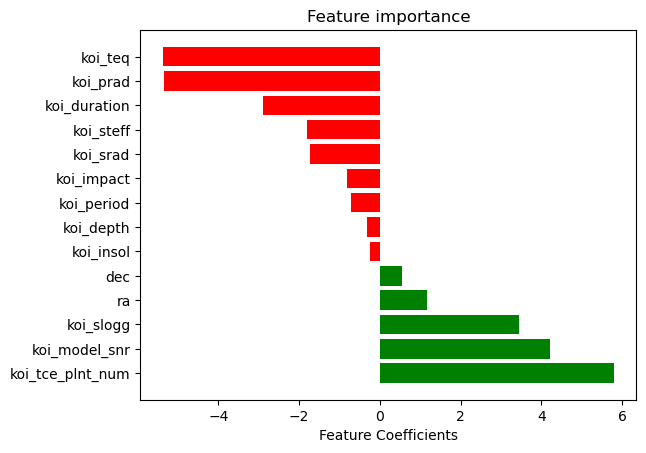

In [703]:
visualize_coefs(coef_dict)

## KNN

In [704]:
from sklearn.neighbors import KNeighborsClassifier

In [705]:
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1920x1440 with 0 Axes>

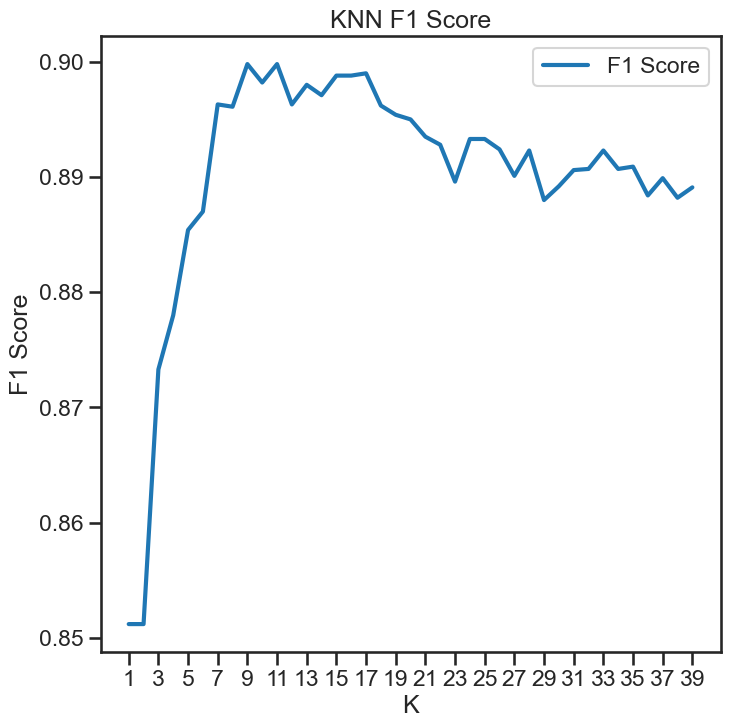

In [706]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(8, 8), linewidth=3)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1920x1440 with 0 Axes>

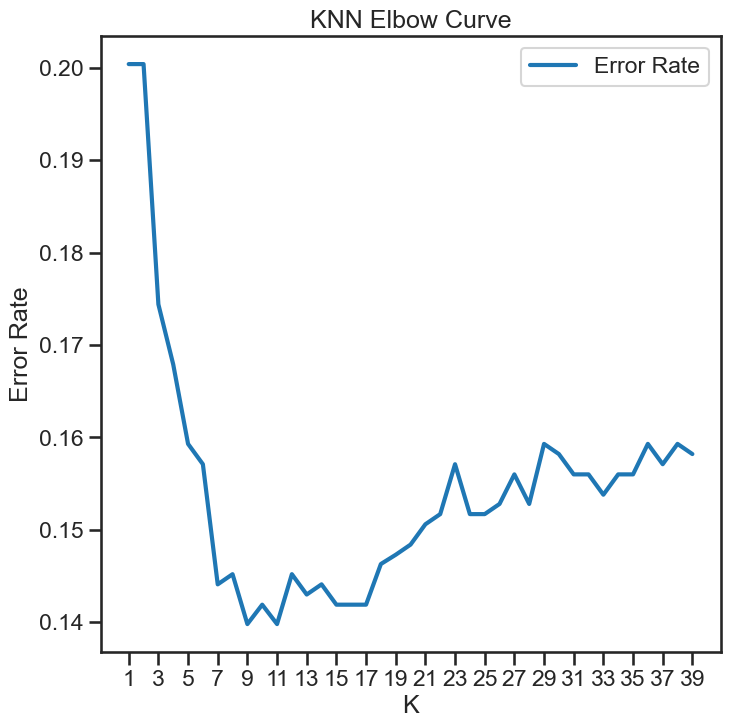

In [707]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(8, 8), linewidth=3)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')
### END SOLUTION

In [708]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=9)
knn = knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test) #without values throws error message for new scikit.learn versions


In [710]:
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, knn_preds))
print('Accuracy score: ', round(accuracy_score(y_test, knn_preds), 2))
print('F1 Score: ', round(f1_score(y_test, knn_preds), 2))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76       315
           1       0.85      0.95      0.90       608

    accuracy                           0.86       923
   macro avg       0.87      0.81      0.83       923
weighted avg       0.86      0.86      0.85       923

Accuracy score:  0.86
F1 Score:  0.9


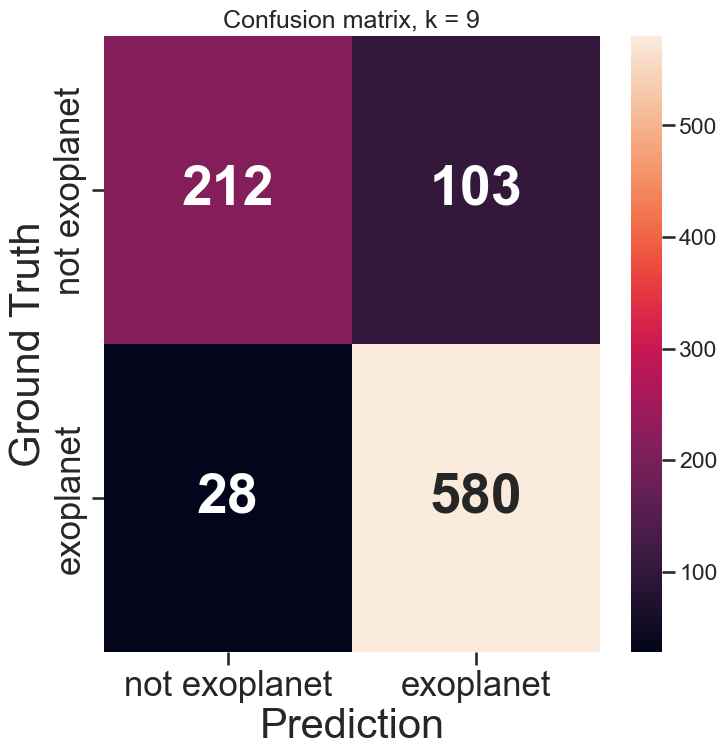

In [713]:
confusion_matrix(y_test, y_pred)
# Plot confusion matrix
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['not exoplanet', 'exoplanet']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_xlabel('Prediction', fontsize=30);
ax.set_ylabel('Ground Truth', fontsize=30)
plt.title("Confusion matrix, k = 9")
plt.savefig('knn_cm.png')
### END SOLUTION

In [714]:
y_unknown_knn = knn.predict(X_unknown)

In [715]:
pd.DataFrame(y_unknown_knn).value_counts()

1    741
0    250
Name: count, dtype: int64

## Decision Tree

In [751]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [752]:
#no pruning tree
dt.tree_.node_count, dt.tree_.max_depth

(431, 19)

In [753]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)


In [754]:

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.804984
precision,1.0,0.851974
recall,1.0,0.851974
f1,1.0,0.851974


Overfitted tree since all the parameters are 1 in training.

In [755]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [756]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(43, 5)

In [757]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [758]:
train_test_gr_error

,train,test
accuracy,0.846725,0.815818
precision,0.858273,0.840062
recall,0.918843,0.889803
f1,0.887526,0.864217


In [759]:
y_unknown_dt=GR.predict(X_unknown)

In [760]:
pd.DataFrame(y_unknown_dt).value_counts()

1    527
0    464
Name: count, dtype: int64

In [761]:
df_unknown.shape

(991, 20)

In [762]:
df_unknown['logreg_l1']=y_unknown_l1
df_unknown['knn']=y_unknown_knn
df_unknown['dt']=y_unknown_dt

In [763]:
df_unknown.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,...,ra,dec,koi_kepmag,label,koi_tce_delivname_q1_q16_tce,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce,logreg_l1,knn,dt
7584,7.240661,137.755450,1.198,0.5580,556.4,19.45,734.0,68.63,13.7,2.0,...,293.83331,50.230350,15.334,CANDIDATE,0,0,1,0,0,1
7585,3.435916,132.662400,0.624,3.1330,23.2,0.55,1272.0,617.61,8.7,3.0,...,287.88733,46.276241,12.791,CANDIDATE,0,0,1,1,1,0
7599,3.886655,169.738140,0.649,3.1646,581.6,1.87,1010.0,246.29,48.1,1.0,...,288.72665,44.607510,15.371,CANDIDATE,0,0,1,1,1,1
7600,2.494170,170.852848,0.095,1.1221,863.7,2.42,1194.0,480.19,69.2,1.0,...,284.75943,45.599129,15.251,CANDIDATE,0,0,1,1,1,0
7601,39.475909,173.312070,0.938,2.9680,1012.6,4.06,577.0,26.13,26.6,1.0,...,291.20804,45.244389,15.229,CANDIDATE,0,0,1,1,1,1


## Bagging

In [764]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [765]:
n_estimators=20
Bag= BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 4,random_state=2),n_estimators=n_estimators,random_state=0,bootstrap=True)

In [766]:
#split data that are not preprocessed with minmaxscaler
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_raw, y, test_size=0.2, stratify=y, random_state = 42)

In [767]:
Bag.fit(X_trainR,y_trainR)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4,
                                                        random_state=2),
                  n_estimators=20, random_state=0)

In [768]:
Bag.predict(X_testR).shape

(616,)

In [769]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [770]:
def get_correlation(X_test, y_test,models):
    #This function calculates the average correlation between predictors  
    n_estimators=len(models.estimators_)
    prediction=np.zeros((y_test.shape[0],n_estimators))
    predictions=pd.DataFrame({'estimator '+str(n+1):[] for n in range(n_estimators)})
    
    for key,model in zip(predictions.keys(),models.estimators_):
        predictions[key]=model.predict(X_test)
    
    corr=predictions.corr()
    print("Average correlation between predictors: ", corr.mean().mean()-1/n_estimators)
    return corr


In [771]:
print(get_accuracy(X_trainR, X_testR, y_trainR, y_testR,  Bag))

{'test Accuracy': 0.8441558441558441, 'train Accuracy': 0.8682926829268293}


In [772]:
get_correlation(X_testR, y_testR, Bag).style.background_gradient(cmap='coolwarm')


Average correlation between predictors:  0.7513723286503076


,estimator 1,estimator 2,estimator 3,estimator 4,estimator 5,estimator 6,estimator 7,estimator 8,estimator 9,estimator 10,estimator 11,estimator 12,estimator 13,estimator 14,estimator 15,estimator 16,estimator 17,estimator 18,estimator 19,estimator 20
estimator 1,1.000000,0.917756,0.897804,0.677631,0.813942,0.766487,0.731455,0.906275,0.733554,0.766487,0.927517,0.631492,0.707811,0.838019,0.753346,0.698208,0.909649,0.831580,0.886182,0.913542
estimator 2,0.917756,1.000000,0.921816,0.677455,0.852709,0.789227,0.719151,0.889424,0.745182,0.745088,0.886044,0.680859,0.727303,0.849794,0.775948,0.700457,0.927645,0.848342,0.903972,0.890312
estimator 3,0.897804,0.921816,1.000000,0.671449,0.823772,0.730747,0.704981,0.870082,0.712507,0.713057,0.890173,0.617848,0.694368,0.802935,0.752900,0.658976,0.907367,0.852289,0.908006,0.877963
estimator 4,0.677631,0.677455,0.671449,1.000000,0.707581,0.859537,0.862196,0.706112,0.846083,0.820389,0.705102,0.711680,0.844994,0.725844,0.835775,0.886816,0.716149,0.721990,0.719057,0.707324
estimator 5,0.813942,0.852709,0.823772,0.707581,1.000000,0.747261,0.773480,0.857729,0.711845,0.729671,0.814945,0.657456,0.738881,0.850803,0.734105,0.747424,0.838941,0.880601,0.855794,0.817596
estimator 6,0.766487,0.789227,0.730747,0.859537,0.747261,1.000000,0.849968,0.764210,0.836461,0.914622,0.756326,0.797743,0.835847,0.805129,0.900667,0.865919,0.788787,0.758622,0.764958,0.763705
estimator 7,0.731455,0.719151,0.704981,0.862196,0.773480,0.849968,1.000000,0.737307,0.877059,0.878132,0.729672,0.744906,0.924860,0.751974,0.873695,0.877339,0.710542,0.766474,0.781490,0.702833
estimator 8,0.906275,0.889424,0.870082,0.706112,0.857729,0.764210,0.737307,1.000000,0.724930,0.705312,0.932526,0.633992,0.743227,0.845647,0.751113,0.706910,0.903264,0.856722,0.895270,0.899950
estimator 9,0.733554,0.745182,0.712507,0.846083,0.711845,0.836461,0.877059,0.724930,1.000000,0.797883,0.750477,0.752843,0.921153,0.795655,0.909186,0.814793,0.746242,0.760228,0.766460,0.764655
estimator 10,0.766487,0.745088,0.713057,0.820389,0.729671,0.914622,0.878132,0.705312,0.797883,1.000000,0.713903,0.779916,0.806747,0.750869,0.872284,0.856329,0.736577,0.715406,0.764958,0.719967


## Random Forest

In [773]:
from sklearn.ensemble import RandomForestClassifier

In [774]:
n_estimators=20

In [775]:
M_features=X_raw.shape[1]

In [776]:
M_features

19

In [777]:
max_features=round(np.sqrt(M_features))-1
max_features

3

In [778]:
model = RandomForestClassifier( max_features=max_features, n_estimators=n_estimators, random_state=0)

In [779]:
model.fit(X_trainR,y_trainR)

RandomForestClassifier(max_features=3, n_estimators=20, random_state=0)

In [780]:
print(get_accuracy(X_trainR, X_testR, y_trainR, y_testR, model))

{'test Accuracy': 0.8766233766233766, 'train Accuracy': 0.9983739837398374}


In [781]:
get_correlation(X_testR, y_testR,model).style.background_gradient(cmap='coolwarm')

Average correlation between predictors:  0.4463886964666777


,estimator 1,estimator 2,estimator 3,estimator 4,estimator 5,estimator 6,estimator 7,estimator 8,estimator 9,estimator 10,estimator 11,estimator 12,estimator 13,estimator 14,estimator 15,estimator 16,estimator 17,estimator 18,estimator 19,estimator 20
estimator 1,1.000000,0.481668,0.451304,0.478581,0.490622,0.504061,0.447780,0.407824,0.472703,0.464582,0.412641,0.437044,0.450483,0.478466,0.450143,0.401095,0.469627,0.463721,0.439192,0.408516
estimator 2,0.481668,1.000000,0.548527,0.528900,0.489608,0.559865,0.542917,0.541033,0.506238,0.539896,0.516393,0.547692,0.546463,0.493497,0.462855,0.518263,0.538261,0.548230,0.471310,0.424474
estimator 3,0.451304,0.548527,1.000000,0.515826,0.469347,0.514314,0.521639,0.467240,0.489912,0.481009,0.486335,0.503598,0.531658,0.472433,0.428391,0.481844,0.443229,0.452623,0.470199,0.395853
estimator 4,0.478581,0.528900,0.515826,1.000000,0.506515,0.498790,0.477910,0.523610,0.474028,0.499425,0.520324,0.521425,0.519908,0.481036,0.449204,0.506549,0.476110,0.465778,0.408934,0.375660
estimator 5,0.490622,0.489608,0.469347,0.506515,1.000000,0.540041,0.491176,0.491773,0.493429,0.497164,0.532544,0.511844,0.473262,0.508952,0.432708,0.437777,0.503192,0.492312,0.472667,0.439962
estimator 6,0.504061,0.559865,0.514314,0.498790,0.540041,1.000000,0.526143,0.498953,0.492899,0.520552,0.461250,0.507577,0.528392,0.513136,0.470287,0.428326,0.539767,0.505124,0.480655,0.421418
estimator 7,0.447780,0.542917,0.521639,0.477910,0.491176,0.526143,1.000000,0.448870,0.443289,0.461435,0.460173,0.483377,0.467096,0.465606,0.456786,0.446444,0.474809,0.464000,0.473561,0.375114
estimator 8,0.407824,0.541033,0.467240,0.523610,0.491773,0.498953,0.448870,1.000000,0.503038,0.523540,0.499929,0.445598,0.495176,0.450801,0.421867,0.438386,0.457057,0.465732,0.476533,0.359941
estimator 9,0.472703,0.506238,0.489912,0.474028,0.493429,0.492899,0.443289,0.503038,1.000000,0.524731,0.536745,0.504659,0.489395,0.481313,0.365283,0.454279,0.465440,0.417292,0.413702,0.361420
estimator 10,0.464582,0.539896,0.481009,0.499425,0.497164,0.520552,0.461435,0.523540,0.524731,1.000000,0.499620,0.458705,0.552240,0.441752,0.441381,0.444169,0.506821,0.508726,0.461947,0.437757


In [782]:
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [783]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}

In [784]:
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy')
search.fit(X_trainR, y_trainR)

GridSearchCV(estimator=RandomForestClassifier(max_features=3, n_estimators=20,
                                              random_state=0),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [785]:
search.best_score_

0.8808943089430894

In [786]:
search.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 37}

In [787]:
print(get_accuracy(X_trainR, X_testR, y_trainR, y_testR, search.best_estimator_))

{'test Accuracy': 0.8798701298701299, 'train Accuracy': 0.9869918699186991}


In [788]:
model_best = RandomForestClassifier( max_features=max_features, n_estimators=37, random_state=0, max_depth=15)

In [790]:
model_best.fit(X_trainR,y_trainR)

RandomForestClassifier(max_depth=15, max_features=3, n_estimators=37,
                       random_state=0)

In [792]:
print(get_accuracy(X_trainR, X_testR, y_trainR, y_testR, model_best))

{'test Accuracy': 0.8863636363636364, 'train Accuracy': 0.9873983739837399}


In [791]:
get_correlation(X_testR, y_testR,model_best).style.background_gradient(cmap='coolwarm')

Average correlation between predictors:  0.467912003684457


,estimator 1,estimator 2,estimator 3,estimator 4,estimator 5,estimator 6,estimator 7,estimator 8,estimator 9,estimator 10,estimator 11,estimator 12,estimator 13,estimator 14,estimator 15,estimator 16,estimator 17,estimator 18,estimator 19,estimator 20,estimator 21,estimator 22,estimator 23,estimator 24,estimator 25,estimator 26,estimator 27,estimator 28,estimator 29,estimator 30,estimator 31,estimator 32,estimator 33,estimator 34,estimator 35,estimator 36,estimator 37
estimator 1,1.000000,0.448219,0.439266,0.426654,0.499681,0.488044,0.473806,0.470804,0.534774,0.419745,0.444522,0.477312,0.497383,0.474037,0.441815,0.422337,0.435192,0.418857,0.498268,0.424160,0.406626,0.462946,0.469771,0.467586,0.476969,0.475963,0.481884,0.487126,0.453110,0.477286,0.478457,0.508486,0.453110,0.472438,0.541956,0.476543,0.472860
estimator 2,0.448219,1.000000,0.433489,0.487215,0.495381,0.463330,0.499670,0.470162,0.456906,0.512885,0.511664,0.538268,0.560153,0.547898,0.462699,0.471734,0.480623,0.396023,0.502861,0.422452,0.422293,0.501286,0.502861,0.467170,0.470719,0.471919,0.508849,0.462803,0.526794,0.438776,0.505328,0.517672,0.482076,0.421157,0.471699,0.572322,0.454354
estimator 3,0.439266,0.433489,1.000000,0.506609,0.538534,0.433602,0.532325,0.449411,0.479192,0.522395,0.496833,0.515617,0.485859,0.540818,0.522913,0.495615,0.480396,0.419585,0.487103,0.424318,0.389032,0.435483,0.516004,0.505063,0.489232,0.493100,0.471002,0.464992,0.446339,0.477709,0.559612,0.481080,0.519744,0.481080,0.493762,0.476626,0.475628
estimator 4,0.426654,0.487215,0.506609,1.000000,0.486655,0.447665,0.509032,0.504481,0.477023,0.507780,0.510248,0.545427,0.508620,0.545768,0.535155,0.544006,0.403252,0.444512,0.510648,0.386725,0.507302,0.507425,0.495572,0.463309,0.465885,0.485954,0.540021,0.480494,0.455651,0.448769,0.515546,0.485421,0.516918,0.477792,0.499824,0.462173,0.483218
estimator 5,0.499681,0.495381,0.538534,0.486655,1.000000,0.487196,0.580132,0.467028,0.547830,0.525301,0.485235,0.533243,0.517908,0.588029,0.489104,0.513320,0.447031,0.473674,0.497404,0.390449,0.391737,0.431134,0.482936,0.500687,0.492429,0.488907,0.510128,0.453046,0.493338,0.480623,0.495492,0.484052,0.530084,0.462089,0.562417,0.546113,0.471431
estimator 6,0.488044,0.463330,0.433602,0.447665,0.487196,1.000000,0.495765,0.457031,0.551331,0.485862,0.467490,0.515114,0.542823,0.504082,0.471648,0.422473,0.436615,0.456060,0.515071,0.432008,0.353307,0.442680,0.421677,0.453904,0.430963,0.478018,0.505947,0.480250,0.468501,0.426690,0.478461,0.466420,0.512293,0.473690,0.486141,0.477037,0.496563
estimator 7,0.473806,0.499670,0.532325,0.509032,0.580132,0.495765,1.000000,0.493756,0.481011,0.490187,0.521437,0.578562,0.548961,0.542194,0.516469,0.472241,0.452872,0.486745,0.491123,0.407646,0.381972,0.458499,0.528336,0.513504,0.460452,0.534042,0.564385,0.501032,0.498382,0.537628,0.459518,0.497165,0.521066,0.489633,0.518530,0.520870,0.501378
estimator 8,0.470804,0.470162,0.449411,0.504481,0.467028,0.457031,0.493756,1.000000,0.428639,0.506883,0.549713,0.495029,0.443652,0.482037,0.486443,0.458262,0.422874,0.397480,0.547690,0.423948,0.416622,0.495029,0.489158,0.483412,0.449738,0.524316,0.531562,0.449370,0.461113,0.492551,0.439047,0.496617,0.468546,0.474404,0.517159,0.536137,0.514039
estimator 9,0.534774,0.456906,0.479192,0.477023,0.547830,0.551331,0.481011,0.428639,1.000000,0.434041,0.505897,0.539398,0.502312,0.505536,0.480276,0.482217,0.431134,0.428345,0.481844,0.455089,0.419762,0.480909,0.481844,0.491924,0.470272,0.473241,0.545317,0.443941,0.440355,0.479096,0.531155,0.460681,0.484557,0.490035,0.539398,0.485353,0.470285
estimator 10,0.419745,0.512885,0.522395,0.507780,0.525301,0.485862,0.490187,0.506883,0.434041,1.000000,0.526624,0.553566,0.546328,0.524971,0.529495,0.440230,0.502944,0.432223,0.555361,0.451212,0.450275,0.486333,0.459040,0.488849,0.457650,0.531475,0.583659,0.491649,0.534013,0.444867,0.488594,0.495055,0.541541,0.465062,0.538626,0.503793,0.528593
